In [40]:
%config Completer.use_jedi = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import xesmf as xe
import os.path

## Example notebook for regridding geospatial data
This uses the xESMF package https://xesmf.readthedocs.io/en/latest/
ESMF is the Earty System Modelling Framwork, a FORTRAN library for regridding geospatial data that is not very user friendly. Someone made a nice python wrapper around it that interfaces nicely with xarray Dataets, hence the "x". It has 5 different regridding algorithms, including a conservative one, although to use that one you need that latitudes and longitudes of the grid cell boundaries, not just their centers, so be warned.

In [18]:
# Load the two grids to be used. Here I'm going to regrid the USGS 10-min resolution global 
# topography onto the 1 degree atmosphere grid from CESM.
ddir = '/home/disk/eos15/apauling/seaice'
dfile1 = 'USGS-gtopo30_10min_c050419.nc'
dfile2 = 'fv_0.9x1.25.nc'

nc1 = os.path.join(ddir, dfile1)
nc2 = os.path.join(ddir, dfile2)

ds1 = xr.open_dataset(nc1)
ds2 = xr.open_dataset(nc2)

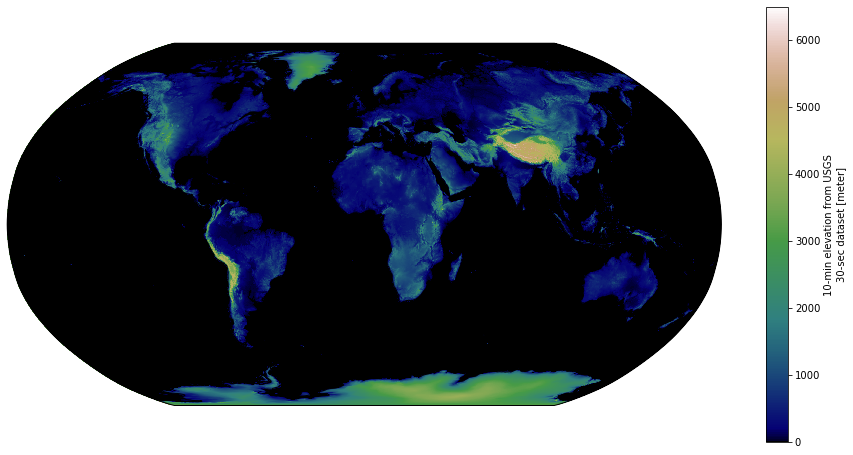

In [36]:
# Load USGS topography data and plot it
htopo = ds1['htopo']

fig = plt.figure(1, figsize=(16, 8))
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()
im = htopo.plot.pcolormesh('lon', 'lat', ax=axs, transform=ccrs.PlateCarree(), cmap='gist_earth')
im.set_clim(0, htopo.max())

## Now use the xESMF package to create the regridding weights
This creates a file that contains the weights, it is kind of slow the first time, but you can set `reuse_weights=True` to make it use the exisiting file every subsequent time you run it.  
In this example I've chosen the `'bilinear'` interpolation method

In [37]:
regridder = xe.Regridder(ds1, ds2, 'bilinear', reuse_weights=True)

Reuse existing file: bilinear_1080x2160_192x288.nc


## Now regrid the topography using the regridding weights we made before

In [38]:
htopo_regrid = regridder(htopo)

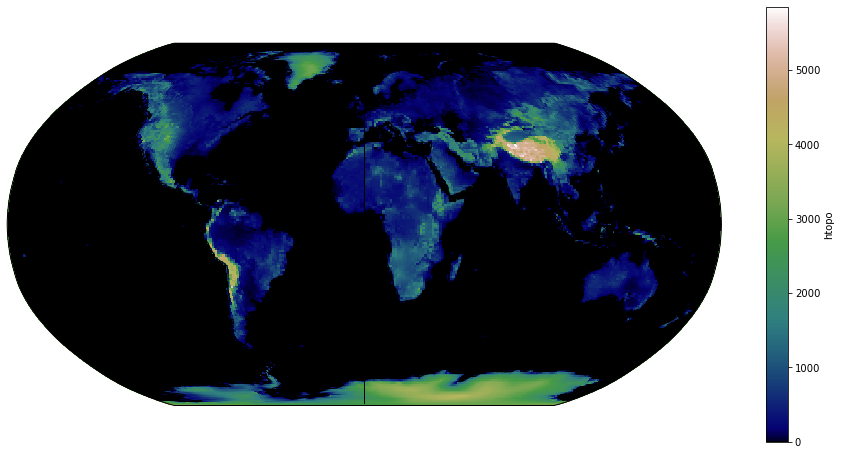

In [39]:
# Plot the regridded topography
fig = plt.figure(1, figsize=(16, 8))
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()
im = htopo_regrid.plot.pcolormesh('lon', 'lat', ax=axs, transform=ccrs.PlateCarree(), cmap='gist_earth')
im.set_clim(0, htopo_regrid.max())